In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
cd /mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/eccDNA/

/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/eccDNA


In [5]:
df = pd.read_csv('Samplevise_eccDNAinfo_tumornormalcounts.tsv',sep='\t',index_col=0)

In [6]:
df.loc['CRC-026','TT_genes'] =1
df.loc['CRC-022','NAT_genes'] =1

In [7]:
df

,Nat,normal_id,Tt,tumor_id,TT_genes,NAT_genes
CRC-021,1101,CRCn-021,11486,CRCtx021,NaN,NaN
CRC-023,1018,CRCn-023,4004,CRCtx023,NaN,NaN
CRC-024,22,CRCn-024,2738,CRCtx024,NaN,NaN
CRC-025,714,CRCn-025,4083,CRCtx025,NaN,NaN
CRC-026,1640,CRCn-026,0,CRCtx026,1.0,NaN
CRC-027,1555,CRCn-027,13115,CRCtx027,NaN,NaN
CRC-028,1024,CRCn-028,11450,CRCtx028,NaN,NaN
CRC-029,2415,CRCn-029,3178,CRCtx029,NaN,NaN
CRC-030,185,CRCn-030,9584,CRCtx030,NaN,NaN
CRC-031,334,CRCn-031,608,CRCtx031,NaN,NaN


In [8]:
df1 = pd.read_csv('Tumor_normal_total_eccDNA.tsv',sep='\t',index_col=0)

In [9]:
df =df[['Tt','Nat']]
df.columns =['TT_genes','NAT_genes']

In [10]:
df1.columns =['TT_total', 'NAT_total']

In [11]:
df2 = df1.join(df)

In [12]:
df2 =df2[['TT_total','TT_genes', 'NAT_total','NAT_genes']]
df2 = df2.sort_values(by=['TT_total', 'NAT_total','TT_genes','NAT_genes'])

In [13]:
df2=df2.fillna(1)

In [14]:
Stack = {}
for i in df2.index:
    Stack[i] = [df2.loc[i,'TT_genes'], df2.loc[i,'TT_total']-df2.loc[i,'TT_genes'],df2.loc[i,'NAT_genes'], df2.loc[i,'NAT_total']-df2.loc[i,'NAT_genes']]

In [15]:
dfper = pd.DataFrame(Stack)

In [16]:
dfper = dfper.T

In [17]:
dfper.columns =  ['TT_genes','Total_rest','Normal_genes','Normal_rest']

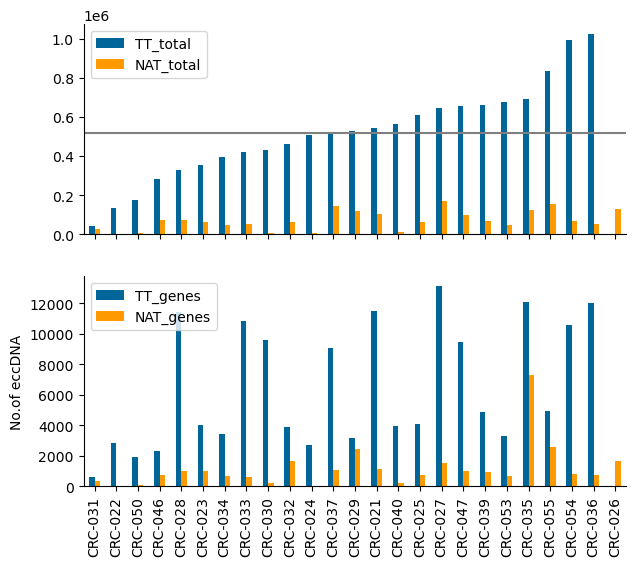

In [18]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(15,6),gridspec_kw={'height_ratios': [1, 1]})
df2[['TT_total','NAT_total']].plot.bar(figsize=(7,6),color = ['#006699','#FF9900'],ax=ax)
ax.axhline(5.197920e+05,  color='grey')
plt.ylabel('No.of eccDNA', fontsize = 10)
df2[['TT_genes','NAT_genes']].plot.bar(figsize=(7,6),color = ['#006699','#FF9900'], ax=ax1)
ax.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylabel('No.of eccDNA', fontsize = 10)
ax.set_xticklabels([])
ax1.set_xticklabels(df2.index, rotation=90, fontsize=10)
#plt.savefig('Figures/TTNATcirclespersample_total_gene.pdf', dpi = 400, bbox_inches = 'tight')
plt.show()

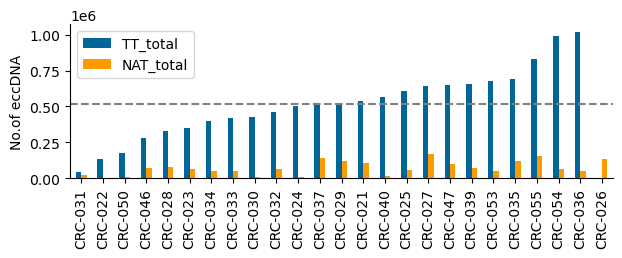

In [19]:
ax =df2[['TT_total','NAT_total']].plot.bar(figsize=(7,2),color = ['#006699','#FF9900'])
ax.axhline(5.197920e+05,  color='grey',  linestyle='--')
plt.ylabel('No.of eccDNA', fontsize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(df2.index, rotation=90, fontsize=10)
#plt.savefig('Figures/TTNATcirclespersample_total.pdf', dpi = 400, bbox_inches = 'tight')
plt.show()

In [20]:
df2.index

Index(['CRC-031', 'CRC-022', 'CRC-050', 'CRC-046', 'CRC-028', 'CRC-023',
       'CRC-034', 'CRC-033', 'CRC-030', 'CRC-032', 'CRC-024', 'CRC-037',
       'CRC-029', 'CRC-021', 'CRC-040', 'CRC-025', 'CRC-027', 'CRC-047',
       'CRC-039', 'CRC-053', 'CRC-035', 'CRC-055', 'CRC-054', 'CRC-036',
       'CRC-026'],
      dtype='object')

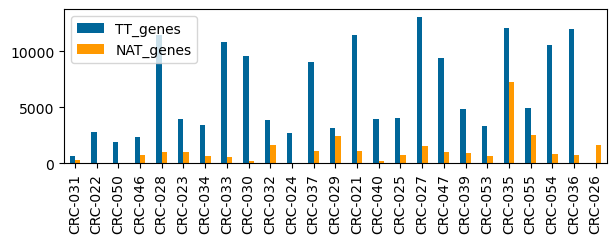

In [21]:
ax =df2[['TT_genes','NAT_genes']].plot.bar(figsize=(7,2),color = ['#006699','#FF9900'])


In [ ]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(15,6),gridspec_kw={'height_ratios': [1, 1]})
dfper[['TT_genes']].plot.bar(stacked=True,figsize=(7,2), color =['#006699','#330099'],ax=ax,)
dfper[['Normal_rest','Normal_genes']].plot.bar(stacked=True, figsize=(7,2),color = ['#FF9900','#006400'],ax=ax1)
ax.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylabel('No.of eccDNA', fontsize = 10)
plt.ylabel("No.of eccDNA", fontsize = 12)
ax.set_xticklabels([])
ax1.set_xticklabels(df2.index, rotation=90, fontsize=10)
plt.show()

In [24]:
Percent = {}
for i in df2.index:
    Percent[i] = [(df2.loc[i,'TT_genes']/df2.loc[i,'TT_total'])*100, 
                  ((df2.loc[i,'TT_total']-df2.loc[i,'TT_genes'])/df2.loc[i,'TT_total'])*100,
                  (df2.loc[i,'NAT_genes']/df2.loc[i,'NAT_total'])*100,
                  ((df2.loc[i,'NAT_total']-df2.loc[i,'NAT_genes'])/df2.loc[i,'NAT_total'])*100]
    

In [25]:
df_per = pd.DataFrame(Percent)

In [26]:
df_per = df_per.T

In [27]:
df_per.columns = (['TT_genes','Total','Normal_genes','Normal'])

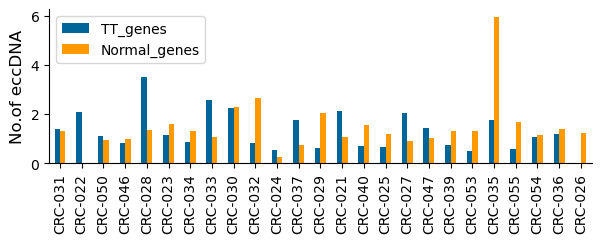

In [32]:
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
df_per[['TT_genes','Normal_genes']].plot.bar(figsize=(7,2), color =['#006699','#FF9900'],ax=ax,)
#df_per[['Normal','Normal_genes']].plot.bar(stacked=True, figsize=(7,2),color = ['','#006400'],ax=ax1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('No.of eccDNA', fontsize = 10)
plt.ylabel("No.of eccDNA", fontsize = 12)
ax.set_xticklabels(df_per.index, rotation=90, fontsize=10)
plt.show()

In [24]:
clinical = pd.read_csv('/mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC/Clinical/Clinical_timeframe2_45samples.txt',sep='\t',index_col=0)

In [25]:
cdf1 = df2.join(clinical)
cdf1 = cdf1.T

In [26]:
cdf1.loc['Tumor location'].unique()

array([4, 1, 8, 3, 10, 6, 9, 5], dtype=object)

In [32]:
cdf1 = cdf1.T.sort_values(by=['TT_total'])
cdf1 =cdf1.T

In [47]:
cdf1.loc['Tumor location'].unique()

array([9, 4, 1, 8, 3, 10, 6, 5], dtype=object)

In [ ]:
['#F08080', '#FF7F50', '#FA8072','#CD5C5C','#E9967A', '#FF6347', '#DC143C', '#B22222']

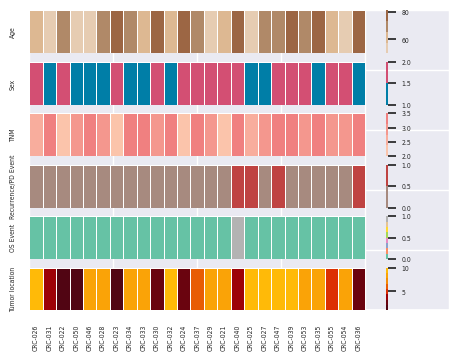

In [50]:
fig, ax = plt.subplots( figsize=(7, 5))
sns.set(context='notebook', font='sans-serif', font_scale=0.4, color_codes=True, rc=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])

ecm = ['#C1B4A7', '#F49E30']
sx = ['#007ea7','#d34f73']
ag = ['#e6ccb2','#ddb892','#b08968','#9c6644']
tn = ['#fbc4ab','#f8ad9d','#f4978e','#f08080']
Rn = ['#a78a7f','#bf4342']
lc1 = ['#E2725B','#B7410E','#B87333','#FFBF00','#FFD700','#CD7F32','#DAA520']
lc2 = ['#F08080',  '#FA8072','#CD5C5C','#E9967A', '#FF6347', '#DC143C', '#B22222']
lc3 = ['#510513','#6A040F','#9D0208','#DC2F02','#E85D04','#F48C06','#FAA307','#FFBA08']

#Age
plt.subplot(6,1,1)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Age')
sns.heatmap(cdf1.loc[['Age']].astype(float), cmap = ag,xticklabels=False,linewidths=.5) ;

#Sex
plt.subplot(6,1,2)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Sex')
sns.heatmap(cdf1.loc[['Sex']].astype(float), cmap = sx,linewidths=.5,xticklabels=False) ;

#Stage
plt.subplot(6,1,3)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Stage')
sns.heatmap(cdf1.loc[['TNM']].astype(float), cmap = tn,linewidths=.5, xticklabels=False) ;

#Relapse
plt.subplot(6,1,4)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Relapse')
sns.heatmap(cdf1.loc[['Recurrence/PD Event']].astype(float), cmap = Rn,linewidths=.5,xticklabels=False) ;

#Vitality
plt.subplot(6,1,5)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Vitality')
sns.heatmap(cdf1.loc[['OS Event']].astype(float), cmap = 'Set2',linewidths=.5) ;

#Tumor location
plt.subplot(6,1,6)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Location')
sns.heatmap(cdf1.loc[['Tumor location']].astype(float), cmap = lc3,linewidths=.5) ;

plt.savefig('Figures/eccDNA_multiplot_withtumorlocation_lc3.pdf',bbox_inches='tight',dpi=300)

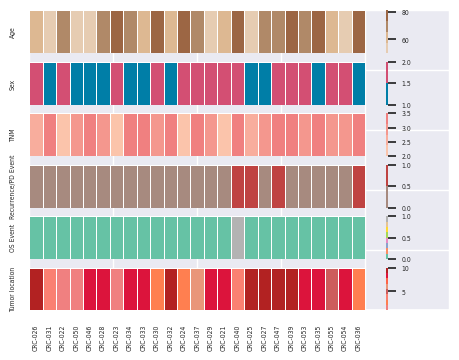

In [35]:
fig, ax = plt.subplots( figsize=(7, 5))
sns.set(context='notebook', font='sans-serif', font_scale=0.4, color_codes=True, rc=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])

ecm = ['#C1B4A7', '#F49E30']
sx = ['#007ea7','#d34f73']
ag = ['#e6ccb2','#ddb892','#b08968','#9c6644']
tn = ['#fbc4ab','#f8ad9d','#f4978e','#f08080']
Rn = ['#a78a7f','#bf4342']
lc1 = ['#E2725B','#D96804','#B7410E','#B87333','#FFBF00','#FFD700','#CD7F32','#D2691E']
lc2 = ['#F08080', '#FF7F50', '#FA8072','#CD5C5C','#E9967A', '#FF6347', '#DC143C', '#B22222']

#Age
plt.subplot(6,1,1)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Age')
sns.heatmap(cdf1.loc[['Age']].astype(float), cmap = ag,xticklabels=False,linewidths=.5) ;

#Sex
plt.subplot(6,1,2)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Sex')
sns.heatmap(cdf1.loc[['Sex']].astype(float), cmap = sx,linewidths=.5,xticklabels=False) ;

#Stage
plt.subplot(6,1,3)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Stage')
sns.heatmap(cdf1.loc[['TNM']].astype(float), cmap = tn,linewidths=.5, xticklabels=False) ;

#Relapse
plt.subplot(6,1,4)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Relapse')
sns.heatmap(cdf1.loc[['Recurrence/PD Event']].astype(float), cmap = Rn,linewidths=.5,xticklabels=False) ;

#Vitality
plt.subplot(6,1,5)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Vitality')
sns.heatmap(cdf1.loc[['OS Event']].astype(float), cmap = 'Set2',linewidths=.5) ;

#Tumor location
plt.subplot(6,1,6)
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
plt.ylabel('Location')
sns.heatmap(cdf1.loc[['Tumor location']].astype(float), cmap = lc2,linewidths=.5) ;

#plt.savefig('Figures/eccDNA_multiplot_withtumorlocation.pdf',bbox_inches='tight',dpi=300)

In [28]:
cdf1 = cdf1.T

In [29]:
for i in cdf1.index:
    x = cdf1.loc[i,'TT_total']
    if x > cdf1['TT_total'].mean():
        cdf1.loc[i,'eccDNA_ttotal_score'] =1
    else:
        cdf1.loc[i,'eccDNA_ttotal_score'] =0

In [30]:
cdf1.to_csv('/mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC/Clinical/Clinical_timeframe2_totaleccDNA.tsv',sep='\t')

In [31]:
cdf1.eccDNA_ttotal_score.value_counts()

eccDNA_ttotal_score
1.0    14
0.0    11
Name: count, dtype: int64

In [32]:
len(cdf1)

25

In [33]:
cdf1

,TT_total,TT_genes,NAT_total,NAT_genes,Tumour tissue samples,CRC pasma Sample ID,CRC Tumour tissue Sampl ID,CRC Normal tissue Sampl ID,BioXpedia sample ID,Diagnosis,...,CEA,YKL40,lL6,CRP,Recurrence/PD Event,Days to Recurrence/PD,OS Event,Days to OS,AZJ Comment,eccDNA_ttotal_score
CRC-031,43789.0,608,25525.0,334,CRCt-031,101,"1,41144E+13","1,41144E+13",BX0214_089,1,...,1,68,"2,3",5,0,2668,0,2668,NaN,0.0
CRC-022,134140.0,2811,1.0,0,CRCt-022,70,"1,4112E+13","1,4112E+13",BX0106_1124,1,...,1,418,"4,8",3,0,2717,0,2717,NaN,0.0
CRC-050,176835.0,1945,6666.0,63,CRCt-050,293,"1,51072E+13","1,51072E+13",BX0214_174,1,...,1,48,"1,5",1,0,2491,0,2491,NaN,0.0
CRC-046,282318.0,2326,74475.0,736,CRCt-046,6,"1,41079E+13","1,41079E+13",BX0106_1011,1,...,11,104,"2,4",5,0,2819,0,2819,NaN,0.0
CRC-028,326884.0,11450,75339.0,1024,CRCt-028,958,"1,71116E+13","1,71116E+13",NaN,1,...,2,83,"1,4",1,0,1615,0,1615,NaN,0.0
CRC-023,352184.0,4004,64346.0,1018,CRCt-023,664,"1,6109E+13","1,6109E+13",NaN,1,...,1,105,"3,6",3,0,2031,0,2031,NaN,0.0
CRC-034,396561.0,3446,49920.0,660,CRCt-034,927,"1,71099E+13","1,71099E+13",NaN,1,...,20,97,"3,6",7,0,1659,0,1659,NaN,0.0
CRC-033,421213.0,10870,53720.0,583,CRCt-033,662,"1,61089E+13","1,61089E+13",NaN,1,...,7,227,"1,3",0,0,2032,0,2032,NaN,0.0
CRC-030,428971.0,9584,8046.0,185,CRCt-030,513,"1,61014E+13","1,61014E+13",NaN,1,...,1,227,"3,5",2,0,2256,0,2256,NaN,0.0
CRC-032,460159.0,3862,63229.0,1676,CRCt-032,712,"1,61113E+13","1,61113E+13",NaN,1,...,1,97,"1,9",2,0,1972,0,1972,NaN,0.0


In [34]:
from scipy.stats import mannwhitneyu

In [35]:
df1 =df1.fillna(0)

In [36]:
statistic, p_value = mannwhitneyu(df1['TT_total'],df1['NAT_total'])

In [37]:
p_value

2.58300493300475e-07